In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import sys,os
import csv
import fileinput
import datetime
from scipy.stats import linregress
api_key = "MTU1MTQ3MjA5NjA5NzAuMDcxMzk0OTcwNzk4OA"

police_url = "https://www.stlouis-mo.gov/powernap/stlouis/api.cfm/requests.json?"
query_url = f"{police_url}api_key={api_key}=&"
dates = "2018-01-01T00:00:00-00:00"
#for date in dates
try:
    police_response = requests.get(query_url +).json()
    print(police_response)
        #.append(npi_response['results']['taxonomies']['code']) 

except ValueError:    
    print(f"no data")
    
    print(json.dumps(police_response, indent=4))

csb_df = pd.DataFrame(police_response)
csb_df

In [237]:
csb_path = "/Users/Renee/Desktop/projects/Project_One/files/2016.csv"
csb_df_2016 = pd.read_csv(csb_path)
csb_df_2016.head()


C:\Users\Renee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,36.0,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,B,NaN,Signal Dark,NaN,803600,901972.46,1019865.04,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,69.0,2016-01-05 00:00:00.0,4900 ANDERSON AVE,B,ST LOUIS,Whole Blk Lights Out,63115,803601,893349.58,1037162.15,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,NaN,2016-01-21 00:00:00.0,4900 Anderson,B,NaN,Misc-Traffic Div,NaN,803602,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,NaN,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,55.0,2016-01-05 00:00:00.0,4900 WABADA AVE,B,NaN,Whole Blk Lights Out,NaN,803603,889953.32,1031461.42,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,NaN,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,NaN,2016-01-05 00:00:00.0,Ray & Gustine,B,NaN,Whole Blk Lights Out,NaN,803604,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN


In [238]:
csb_path = "/Users/Renee/Desktop/projects/Project_One/files/2017.csv"
csb_df_2017 = pd.read_csv(csb_path)
csb_df_2017.head()

C:\Users\Renee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2017-01-01 01:37:08.0,2017-01-01 01:40:28.893,2017-01-01 00:56:48.563,Misc-Street Div,36.0,2017-01-20 00:00:00.0,MARKET ST & S 16TH ST,B,NaN,Misc-Street Div,NaN,925943,904825.49,1017901.54,CLOSED,"STREET DIVISION, 514",07
1,PHONE,NaN,2017-01-02 15:00:00.0,2017-01-03 07:34:47.77,2017-01-01 03:15:00.763,Whole block lights out,85.0,2017-01-04 00:00:00.0,ATHLONE AVE & WEST FLORISSANT AVE,B,NaN,Whole Blk Lights Out,NaN,925944,899280.95,1035910.98,CLOSED,"TRAFFIC DIVISION, 511",21
2,WEB,NaN,2017-01-03 07:52:49.0,2017-01-31 15:42:47.367,2017-01-01 09:52:29.0,Check Welfare,2.0,2017-01-23 00:00:00.0,513 KOELN AVE,A,NaN,Check Welfare,NaN,925945,888524.86,989539.37,CLOSED,"ANIMAL CARE,",11
3,WEB,NaN,2017-01-03 15:53:44.0,2017-01-09 12:53:46.587,2017-01-01 11:44:27.0,Vehicle Towing,9.0,2017-01-10 00:00:00.0,6011 FYLER AVE,A,NaN,Vehicle Towing,NaN,925946,879599.22,1008098.65,CLOSED,"STREET DEPT, 510",23
4,WEB,NaN,2017-01-25 08:16:17.0,2017-01-25 08:16:06.117,2017-01-01 11:50:53.0,Stump Removal,38.0,2017-01-23 00:00:00.0,4256 MARYLAND AVE,A,NaN,Stump Removal,NaN,925947,891611.17,1022598.02,CLOSED,"FORESTRY,",18


In [239]:
csb_path = "/Users/Renee/Desktop/projects/Project_One/files/2018.csv"
csb_df_2018 = pd.read_csv(csb_path,  encoding="ISO-8859-1")
csb_df_2018.head()

C:\Users\Renee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,WEB,NaN,2018-01-05 16:22:19.0,2018-01-05 16:22:21.287,2018-01-01 00:48:30.0,WTR-COMING-UP,8,2018-01-15 00:00:00.0,75 WILLMORE RD,A,NaN,WTR-COMING-UP,NaN,1049265,875854.877,998434.947,CLOSED,"WATER DIV,",16
1,WEB,NaN,2018-01-05 16:22:19.0,2018-01-05 16:22:21.287,2018-01-01 00:48:30.0,WTR-COMING-UP,8,2018-01-15 00:00:00.0,75 WILLMORE RD,A,NaN,WTR-COMING-UP,NaN,1049265,875854.877,998434.947,CLOSED,"WATER DIV,",16
2,WEB,NaN,NaN,NaN,2018-01-01 05:29:06.0,"NOWATER (due to main break, etc.)",1,2018-01-15 00:00:00.0,6739 VERMONT AVE,A,NaN,NOWATER,NaN,1049266,889804.745,991410.133,Disptch,"WATER DIV,",11
3,WEB,NaN,2018-01-05 16:17:41.0,2018-01-05 16:18:08.673,2018-01-01 08:53:07.0,"NOWATER (due to main break, etc.)",7,2018-01-15 00:00:00.0,5444 ITASKA ST,A,NaN,NOWATER,NaN,1049267,881254.532,1001624.815,CLOSED,"WATER DIV,",16
4,PHONE,NaN,2018-01-01 10:40:14.0,2018-01-01 10:40:54.27,2018-01-01 09:13:22.777,Signal Stuck,60,2018-01-04 00:00:00.0,CASS AVE & N 20TH ST,B,NaN,Signal Stuck,NaN,1049268,904417.543,1023278.246,CLOSED,"TRAFFIC DIVISION, 511",05


In [240]:
frames = [csb_df_2016, csb_df_2017, csb_df_2018]
results = pd.concat(frames)
results.head()

,CALLERTYPE,DATECANCELLED,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,NEIGHBORHOOD,PRJCOMPLETEDATE,PROBADDRESS,PROBADDTYPE,PROBCITY,PROBLEMCODE,PROBZIP,REQUESTID,SRX,SRY,STATUS,SUBMITTO,WARD
0,PHONE,NaN,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,36,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,B,NaN,Signal Dark,NaN,803600,901972.46,1019865.04,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,69,2016-01-05 00:00:00.0,4900 ANDERSON AVE,B,ST LOUIS,Whole Blk Lights Out,63115,803601,893349.58,1037162.15,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,NaN,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,NaN,2016-01-21 00:00:00.0,4900 Anderson,B,NaN,Misc-Traffic Div,NaN,803602,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,NaN,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,55,2016-01-05 00:00:00.0,4900 WABADA AVE,B,NaN,Whole Blk Lights Out,NaN,803603,889953.32,1031461.42,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,NaN,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,NaN,2016-01-05 00:00:00.0,Ray & Gustine,B,NaN,Whole Blk Lights Out,NaN,803604,NaN,NaN,CLOSED,"TRAFFIC DIVISION, 511",NaN


In [241]:
len(results)

356304

In [242]:
results.columns

Index(['CALLERTYPE', 'DATECANCELLED', 'DATEINVTDONE', 'DATETIMECLOSED',
       'DATETIMEINIT', 'DESCRIPTION', 'NEIGHBORHOOD', 'PRJCOMPLETEDATE',
       'PROBADDRESS', 'PROBADDTYPE', 'PROBCITY', 'PROBLEMCODE', 'PROBZIP',
       'REQUESTID', 'SRX', 'SRY', 'STATUS', 'SUBMITTO', 'WARD'],
      dtype='object')

In [243]:
results.count()

CALLERTYPE         316958
DATECANCELLED       11557
DATEINVTDONE       337397
DATETIMECLOSED     321821
DATETIMEINIT       356304
DESCRIPTION        356299
NEIGHBORHOOD       323868
PRJCOMPLETEDATE    354117
PROBADDRESS        353884
PROBADDTYPE        356304
PROBCITY            13500
PROBLEMCODE        356304
PROBZIP             15680
REQUESTID          356304
SRX                343439
SRY                343441
STATUS             356181
SUBMITTO           356128
WARD               326247
dtype: int64

In [244]:
results.dtypes

CALLERTYPE          object
DATECANCELLED       object
DATEINVTDONE        object
DATETIMECLOSED      object
DATETIMEINIT        object
DESCRIPTION         object
NEIGHBORHOOD        object
PRJCOMPLETEDATE     object
PROBADDRESS         object
PROBADDTYPE         object
PROBCITY            object
PROBLEMCODE         object
PROBZIP             object
REQUESTID            int64
SRX                float64
SRY                float64
STATUS              object
SUBMITTO            object
WARD                object
dtype: object

In [245]:
clean_results = results[['CALLERTYPE', 'DATEINVTDONE', 'DATETIMECLOSED',
       'DATETIMEINIT', 'DESCRIPTION', 'PRJCOMPLETEDATE',
       'PROBADDRESS', 'PROBLEMCODE',
       'REQUESTID', 'STATUS', 'SUBMITTO', 'WARD']]

clean_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01
2,PHONE,2016-01-01 00:00:00.0,2016-01-01 06:00:08.563,2016-01-01 01:22:48.133,Misc-Traffic Div,2016-01-21 00:00:00.0,4900 Anderson,Misc-Traffic Div,803602,CLOSED,"TRAFFIC DIVISION, 511",NaN
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01
4,PHONE,2016-01-02 01:12:34.67,2016-01-02 01:13:25.89,2016-01-01 02:37:31.323,Whole block lights out,2016-01-05 00:00:00.0,Ray & Gustine,Whole Blk Lights Out,803604,CLOSED,"TRAFFIC DIVISION, 511",NaN


In [246]:
clean_results.DESCRIPTION.unique()
len(clean_results.DESCRIPTION.unique())

347

In [247]:
clean_results.count()

CALLERTYPE         316958
DATEINVTDONE       337397
DATETIMECLOSED     321821
DATETIMEINIT       356304
DESCRIPTION        356299
PRJCOMPLETEDATE    354117
PROBADDRESS        353884
PROBLEMCODE        356304
REQUESTID          356304
STATUS             356181
SUBMITTO           356128
WARD               326247
dtype: int64

In [248]:
nona_results = clean_results.dropna(how='any')

In [249]:
nona_results.WARD.value_counts()

27          8484
02          8346
07          8197
03          7608
21          7343
20          7223
24          7172
04          6682
01          6453
09          6281
22          6118
18          6114
11          5966
25          5871
15          5843
06          5660
16          5460
14          5450
10          5164
23          5101
26          5087
17          5051
12          4908
08          4830
13          4805
05          4712
3.0         4580
2.0         4396
27.0        4323
19          4319
            ... 
22.0        3221
18.0        3181
6.0         2981
23.0        2935
14.0        2926
26.0        2926
10.0        2920
15.0        2893
17.0        2864
8.0         2781
12.0        2775
1.0         2737
5.0         2728
28.0        2535
13.0        2513
19.0        2407
20 & 9         4
7 & 6          4
9 & 20         3
6 & 7          2
7              1
a              1
13 & 11        1
20             1
7 & 9          1
11 or 12       1
9 & 7          1
14            

In [250]:
nona_results = nona_results[(nona_results.WARD != 'a') & (nona_results.WARD != '7 & 9') 
                            & (nona_results.WARD != '7 & 6') & (nona_results.WARD != '20 & 9')
                            & (nona_results.WARD != '6 & 7') & (nona_results.WARD != '7')
                           & (nona_results.WARD != '11 or 12') & (nona_results.WARD != '16,10,23')
                           & (nona_results.WARD != '14') & (nona_results.WARD != '13 & 11')
                           & (nona_results.WARD != '003') & (nona_results.WARD != '20')
                           & (nona_results.WARD != '9 & 7')& (nona_results.WARD != '9 & 20')]

In [251]:
nona_results.WARD.value_counts()

27      8484
02      8346
07      8197
03      7608
21      7343
24      7172
04      6682
01      6453
09      6281
22      6118
18      6114
11      5966
25      5871
15      5843
06      5660
16      5460
10      5164
23      5101
26      5087
17      5051
12      4908
08      4830
13      4805
05      4712
3.0     4580
2.0     4396
27.0    4323
19      4319
24.0    4301
7.0     4197
28      4100
20.0    4036
21.0    3581
11.0    3461
4.0     3347
9.0     3334
16.0    3317
25.0    3296
22.0    3221
18.0    3181
6.0     2981
23.0    2935
14.0    2926
26.0    2926
10.0    2920
15.0    2893
17.0    2864
8.0     2781
12.0    2775
1.0     2737
5.0     2728
28.0    2535
13.0    2513
19.0    2407
20         1
14         1
Name: WARD, dtype: int64

In [252]:
nona_results.count()

CALLERTYPE         247169
DATEINVTDONE       247169
DATETIMECLOSED     247169
DATETIMEINIT       247169
DESCRIPTION        247169
PRJCOMPLETEDATE    247169
PROBADDRESS        247169
PROBLEMCODE        247169
REQUESTID          247169
STATUS             247169
SUBMITTO           247169
WARD               247169
dtype: int64

In [253]:
nona_results.WARD.astype(int)

0          6
1          1
3          1
6         28
7         15
9         24
10        19
12        19
14        27
15        27
16        12
17        24
18        25
19         4
20         6
21        16
23         1
24        10
27         3
28         5
29         9
35        19
36        23
37         5
38         5
39         6
40         8
41        10
42        22
45         4
          ..
119659    16
119660     3
119665    26
119667    24
119668    10
119669     1
119670    24
119671     3
119672    28
119675    26
119681    25
119682     3
119687    18
119688     7
119691    13
119693    26
119694     1
119697    12
119698     6
119700     9
119703    27
119707     7
119710    18
119713    23
119714    26
119715    26
119716    23
119717     1
119718     1
119719    27
Name: WARD, Length: 247169, dtype: int32

In [254]:
nona_results.WARD.value_counts()

27      8484
02      8346
07      8197
03      7608
21      7343
24      7172
04      6682
01      6453
09      6281
22      6118
18      6114
11      5966
25      5871
15      5843
06      5660
16      5460
10      5164
23      5101
26      5087
17      5051
12      4908
08      4830
13      4805
05      4712
3.0     4580
2.0     4396
27.0    4323
19      4319
24.0    4301
7.0     4197
28      4100
20.0    4036
21.0    3581
11.0    3461
4.0     3347
9.0     3334
16.0    3317
25.0    3296
22.0    3221
18.0    3181
6.0     2981
23.0    2935
14.0    2926
26.0    2926
10.0    2920
15.0    2893
17.0    2864
8.0     2781
12.0    2775
1.0     2737
5.0     2728
28.0    2535
13.0    2513
19.0    2407
20         1
14         1
Name: WARD, dtype: int64

In [255]:
nona_results.DATETIMEINIT.value_counts()

2018-10-15 20:37:57.507    14
2018-09-04 15:18:51.157     7
2018-05-12 18:32:20.0       7
2017-08-31 21:25:17.0       6
2017-12-01 14:30:19.0       5
2018-07-05 10:50:38.0       5
2018-03-27 09:12:38.837     5
2017-04-13 12:54:24.0       5
2018-01-23 08:17:20.0       5
2017-11-08 21:13:36.0       5
2016-07-12 08:31:36.0       4
2016-09-22 08:50:23.0       4
2016-05-02 07:57:53.0       4
2018-07-06 08:31:24.0       4
2018-12-30 17:24:26.0       4
2017-07-26 14:19:27.0       4
2017-05-02 10:27:30.927     4
2018-08-29 21:40:12.503     4
2017-10-16 16:04:37.13      4
2017-07-18 08:31:55.51      4
2016-04-25 23:41:57.0       4
2017-12-04 11:21:57.0       4
2017-05-01 11:22:37.0       4
2017-12-22 19:22:13.713     4
2017-01-29 18:12:40.0       4
2016-04-28 08:05:28.0       4
2018-02-14 18:53:33.0       4
2017-09-13 05:31:43.0       4
2018-06-06 16:41:50.0       4
2017-01-23 12:11:08.0       4
                           ..
2018-06-27 14:15:50.73      1
2017-02-14 16:06:55.62      1
2016-06-30

In [256]:
new = nona_results["DATETIMEINIT"].str.split(" ", n = -1, expand = True) 
nona_results["initdate"]= new[0] 
  

In [257]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01


In [258]:

new = nona_results["initdate"].str.split("-", n = -1, expand = True) 
nona_results["inityear"]= new[0] 
  
nona_results["initmonth"]= new[1] 
nona_results["initday"] = new[2]

In [259]:
nona_results.head(50)

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01
9,WEB,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,2016-01-08 00:00:00.0,6538 NASHVILLE AV,Did not get cart,803609,CLOSED,"REFUSE,",24,2016-01-01,2016,01,01
10,WEB,2016-01-04 09:50:00.0,2016-01-04 21:48:46.323,2016-01-01 13:49:42.0,Sign needs attention,2016-01-06 00:00:00.0,DR MARTIN LUTHER KING DR & N CARDINAL AVE,Sign needs attention,803610,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
12,PHONE,2016-01-01 15:54:49.767,2016-01-01 15:55:37.177,2016-01-01 15:53:35.587,Signal Dark,2016-01-06 00:00:00.0,N GRAND AVE & COOK AVE,Signal Dark,803612,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
14,WEB,2016-01-05 01:39:21.0,2016-01-07 01:39:57.953,2016-01-01 16:30:38.0,Single street light out,2016-01-06 00:00:00.0,5050 THRUSH AVE,Single Light Out,803614,CLOSED,"TRAFFIC DIVISION, 511",27,2016-01-01,2016,01,01
15,WEB,2016-02-04 10:05:48.18,2016-02-04 10:06:18.483,2016-01-01 16:42:20.0,Vacnt Bldg Unsecured,2016-01-22 00:00:00.0,5044 THRUSH AVE,Vacnt Bldg Unsecured,803615,CLOSED,"BUILDING DIV,",27,2016-01-01,2016,01,01


In [260]:
nona_results.dtypes

CALLERTYPE         object
DATEINVTDONE       object
DATETIMECLOSED     object
DATETIMEINIT       object
DESCRIPTION        object
PRJCOMPLETEDATE    object
PROBADDRESS        object
PROBLEMCODE        object
REQUESTID           int64
STATUS             object
SUBMITTO           object
WARD               object
initdate           object
inityear           object
initmonth          object
initday            object
dtype: object

In [261]:
results2016 = nona_results[(nona_results["Date Requested"].str.contains("2016") == True)]

KeyError: 'Date Requested'

In [262]:
requests_2016 = nona_results[(nona_results["inityear"].str.contains("2016") == True)]
requests_2017 = nona_results[(nona_results["inityear"].str.contains("2017") == True)]
requests_2018 = nona_results[(nona_results["inityear"].str.contains("2018") == True)]

In [263]:
requests_2016

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01
9,WEB,2016-01-07 13:11:47.137,2016-01-07 13:12:01.847,2016-01-01 13:10:14.0,Did not get cart,2016-01-08 00:00:00.0,6538 NASHVILLE AV,Did not get cart,803609,CLOSED,"REFUSE,",24,2016-01-01,2016,01,01
10,WEB,2016-01-04 09:50:00.0,2016-01-04 21:48:46.323,2016-01-01 13:49:42.0,Sign needs attention,2016-01-06 00:00:00.0,DR MARTIN LUTHER KING DR & N CARDINAL AVE,Sign needs attention,803610,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
12,PHONE,2016-01-01 15:54:49.767,2016-01-01 15:55:37.177,2016-01-01 15:53:35.587,Signal Dark,2016-01-06 00:00:00.0,N GRAND AVE & COOK AVE,Signal Dark,803612,CLOSED,"TRAFFIC DIVISION, 511",19,2016-01-01,2016,01,01
14,WEB,2016-01-05 01:39:21.0,2016-01-07 01:39:57.953,2016-01-01 16:30:38.0,Single street light out,2016-01-06 00:00:00.0,5050 THRUSH AVE,Single Light Out,803614,CLOSED,"TRAFFIC DIVISION, 511",27,2016-01-01,2016,01,01
15,WEB,2016-02-04 10:05:48.18,2016-02-04 10:06:18.483,2016-01-01 16:42:20.0,Vacnt Bldg Unsecured,2016-01-22 00:00:00.0,5044 THRUSH AVE,Vacnt Bldg Unsecured,803615,CLOSED,"BUILDING DIV,",27,2016-01-01,2016,01,01


In [264]:
group_2016 = requests_2016.groupby(['initmonth']).count()
group_2017 = requests_2017.groupby(['initmonth']).count()
group_2018 = requests_2018.groupby(['initmonth']).count()
overall = nona_results.groupby(['initmonth']).count()/3

In [265]:
overall

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initday
initmonth,,,,,,,,,,,,,,,
01,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
02,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333,5147.333333
03,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667,6403.666667
04,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667,6243.666667
05,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333,8393.333333
06,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667,8762.666667
07,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000
08,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333,8547.333333
09,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667,7202.666667


In [266]:
#x_axis6 = np.arange(len(group_2016))
#x_axis7 = np.arange(len(group_2017))
#x_axis8 = np.arange(len(group_2018))
x_axis = np.arange(len(group_2017))

In [267]:
tick_locations = [value+width for value in x_axis]

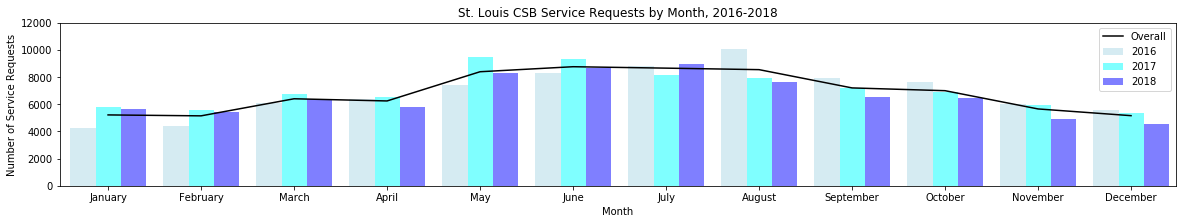

In [268]:

width = 0.27
fig = plt.figure(figsize=(20,3))
plt.bar(x_axis, group_2016["REQUESTID"], width, color='lightblue', alpha=0.5, align="center")
plt.bar(x_axis+width, group_2017["REQUESTID"], width, color='aqua', alpha=0.5, align="center")
plt.bar(x_axis+width*2, group_2018["REQUESTID"], width, color='b', alpha=0.5, align="center")
plt.plot(x_axis+width, overall["REQUESTID"], color = 'black')
plt.autoscale(tight=True)

plt.xticks(tick_locations,['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation="horizontal")
plt.xlim(-0.25, len(x_axis6)-0.25)
plt.ylim(0, 12000)

plt.title("St. Louis CSB Service Requests by Month, 2016-2018")
plt.xlabel("Month")
plt.ylabel("Number of Service Requests")
plt.legend(["Overall", "2016", "2017", "2018"])

plt.savefig("monthlytemp.png")


In [189]:
weather_path = "/Users/Renee/Desktop/projects/Project_One/files/Weather.csv"
weather = pd.read_csv(weather_path)
weather.head()


,Month,Avg_Temp,YearMonth
0,January,33.8,2016_01
1,February,40.2,2016_02
2,March,53.0,2016_03
3,April,59.9,2016_04
4,May,66.4,2016_05


In [190]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,combined
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01,2016_01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01,2016_01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01,2016_01


In [193]:
nona_results['YearMonth']=nona_results.apply(lambda x:'%s_%s' % (x['inityear'],x['initmonth']),axis=1)

In [194]:
nona_results.head()

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,combined,YearMonth
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,2016-01-06 00:00:00.0,LOCUST BLVD & N JEFFERSON AVE,Signal Dark,803600,CLOSED,"TRAFFIC DIVISION, 511",06,2016-01-01,2016,01,01,2016_01,2016_01
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,2016-01-05 00:00:00.0,4900 ANDERSON AVE,Whole Blk Lights Out,803601,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01,2016_01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,2016-01-05 00:00:00.0,4900 WABADA AVE,Whole Blk Lights Out,803603,CLOSED,"TRAFFIC DIVISION, 511",01,2016-01-01,2016,01,01,2016_01,2016_01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,2016-01-12 00:00:00.0,5941 LINDELL BLVD,Hole-bottom of cont,803606,CLOSED,"REFUSE,",28,2016-01-01,2016,01,01,2016_01,2016_01
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,2016-01-06 00:00:00.0,GRAVOIS RD & POTOMAC ST,Dead Animal,803607,CLOSED,"REFUSE,",15,2016-01-01,2016,01,01,2016_01,2016_01


In [207]:
grouped = nona_results.groupby(['YearMonth']).count()
grouped

,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,combined
YearMonth,,,,,,,,,,,,,,,,,
2016_01,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257
2016_02,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434
2016_03,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074
2016_04,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411
2016_05,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399
2016_06,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297,8297
2016_07,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815,8815
2016_08,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078,10078
2016_09,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898,7898


In [208]:
merged_results = pd.merge(grouped, weather, on='YearMonth')
merged_results.head()

,YearMonth,CALLERTYPE,DATEINVTDONE,DATETIMECLOSED,DATETIMEINIT,DESCRIPTION,PRJCOMPLETEDATE,PROBADDRESS,PROBLEMCODE,REQUESTID,STATUS,SUBMITTO,WARD,initdate,inityear,initmonth,initday,combined,Month,Avg_Temp
0,2016_01,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,January,33.8
1,2016_02,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,February,40.2
2,2016_03,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,6074,March,53.0
3,2016_04,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,6411,April,59.9
4,2016_05,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,May,66.4


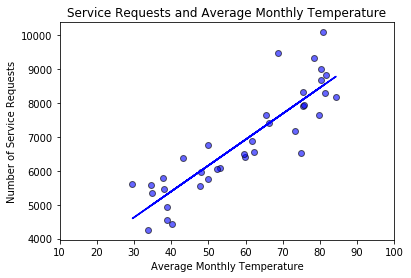

In [233]:

plt.scatter(merged_results['Avg_Temp'], merged_results['REQUESTID'], marker="o", facecolor = "b", edgecolor = "black", alpha=0.60)
plt.title("Service Requests and Average Monthly Temperature")
plt.ylabel("Number of Service Requests")
plt.xlabel("Average Monthly Temperature")
plt.xlim(10, 100)
(slope, intercept, _, _, _) = linregress(merged_results['Avg_Temp'], merged_results['REQUESTID'])
fit = slope * merged_results['Avg_Temp'] + intercept
plt.plot(merged_results['Avg_Temp'], fit, 'b')
plt.savefig("weatherrequest.png")
plt.show()